<a href="https://colab.research.google.com/github/AMEERKOTTA/Deep-Learning-and-Artificial-Intelligence-Tensorflow-2.0/blob/main/Chapter%2006%20%3A%20Recurrent%20Neural%20Networks%2C%20Time%20Series%20and%20Sequence%20Data/13_demo_of_long_distance_problem_lstm_model_for_distance_applied.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DEMO LONG DISTANCE PROBLEM - LSTM MODEL**

Using the Long Distance Problem.

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
## build the dataset
## this is a non-linear and long distance dataset.
## Will test (long-distance) vs (short-distance) patterns.
## starts with a small T and increase it later.
T = 10
D = 1
X = []
Y = []

## function to get label from i1, i2, i3
def get_label(x, i1, i2, i3):
  ## x = sequence
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) ## long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

print(X.shape)
print(Y.shape)

(5000, 10)
(5000,)


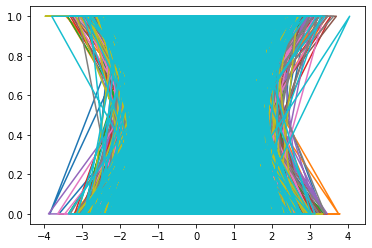

In [3]:
## plot the X and Y
plt.plot(X,Y);

In [4]:
## define the inputs
print(X.shape)
## expand the input size to RNN dimension.
inputs = np.expand_dims(X, -1)
print(inputs.shape)

## define the model
i = Input(shape = (T, D))
x = LSTM(5)(i)
x = Dense(1, activation = "sigmoid")(x)
model = Model(i, x)
model.summary()

## compile the model
model.compile(
    loss = "binary_crossentropy",
    optimizer = Adam(learning_rate = 0.01),
    metrics = ["accuracy"]
)

## train the model
r = model.fit(inputs, Y, epochs = 200, validation_split = 0.5)

(5000, 10)
(5000, 10, 1)
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 lstm (LSTM)                 (None, 5)                 140       
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
79/79 [==============================] - 4s 19ms/step - loss: 0.6942 - accuracy: 0.4996 - val_loss: 0.6930 - val_accuracy: 0.4964
Epoch 2/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6932 - accuracy: 0.5016 - val_loss: 0.6940 - val_accuracy: 0.4976
Epoch 3/200
79/79 

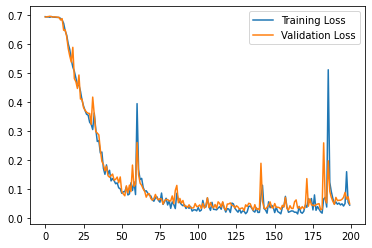

In [5]:
## plot the loss and accuracy
plt.plot(r.history["loss"], label = "Training Loss")
plt.plot(r.history["val_loss"], label = "Validation Loss")
plt.legend();
plt.show();

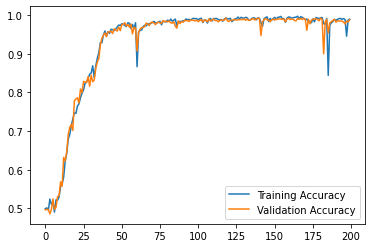

In [6]:
## plot the loss and accuracy
plt.plot(r.history["accuracy"], label = "Training Accuracy")
plt.plot(r.history["val_accuracy"], label = "Validation Accuracy")
plt.legend();
plt.show();

Here we used the LSTM model
+ Here we have better result to comparing with the Simple RNN model.
+ Lower Loss and Higher Accuracy.
+ And they Generalizes Well.

***

INCREASING THE SEQUENCE LENGTH BY T = 20.

In [7]:
## build the dataset
## this is a non-linear and long distance dataset.
## Will test (long-distance) vs (short-distance) patterns.
## starts with a small T and increase it later.
T = 20
D = 1
X = []
Y = []

## function to get label from i1, i2, i3
def get_label(x, i1, i2, i3):
  ## x = sequence
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) ## long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

print(X.shape)
print(Y.shape)

(5000, 20)
(5000,)


In [8]:
## define the inputs
print(X.shape)
## expand the input size to RNN dimension.
inputs = np.expand_dims(X, -1)
print(inputs.shape)

## define the model
i = Input(shape = (T, D))
x = LSTM(5)(i)
x = Dense(1, activation = "sigmoid")(x)
model = Model(i, x)
model.summary()

## compile the model
model.compile(
    loss = "binary_crossentropy",
    optimizer = Adam(learning_rate = 0.01),
    metrics = ["accuracy"]
)

## train the model
r = model.fit(inputs, Y, epochs = 200, validation_split = 0.5)

(5000, 20)
(5000, 20, 1)
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 20, 1)]           0         
                                                                 
 lstm_1 (LSTM)               (None, 5)                 140       
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
79/79 [==============================] - 5s 27ms/step - loss: 0.6937 - accuracy: 0.5076 - val_loss: 0.6957 - val_accuracy: 0.5004
Epoch 2/200
79/79 [==============================] - 1s 16ms/step - loss: 0.6929 - accuracy: 0.5196 - val_loss: 0.6941 - val_accuracy: 0.5008
Epoch 3/200
79/7

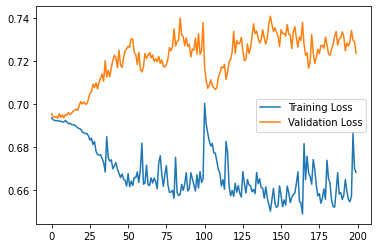

In [9]:
## plot the loss and accuracy
plt.plot(r.history["loss"], label = "Training Loss")
plt.plot(r.history["val_loss"], label = "Validation Loss")
plt.legend();
plt.show();

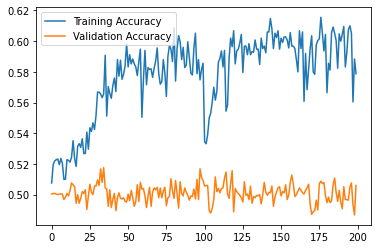

In [10]:
## plot the loss and accuracy
plt.plot(r.history["accuracy"], label = "Training Accuracy")
plt.plot(r.history["val_accuracy"], label = "Validation Accuracy")
plt.legend();
plt.show();

***

INCREASING THE SEQUENCE LENGTH BY T = 30.

In [11]:
## build the dataset
## this is a non-linear and long distance dataset.
## Will test (long-distance) vs (short-distance) patterns.
## starts with a small T and increase it later.
T = 30
D = 1
X = []
Y = []

## function to get label from i1, i2, i3
def get_label(x, i1, i2, i3):
  ## x = sequence
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) ## long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

print(X.shape)
print(Y.shape)

(5000, 30)
(5000,)


In [13]:
## define the inputs
print(X.shape)
## expand the input size to RNN dimension.
inputs = np.expand_dims(X, -1)
print(inputs.shape)

## define the model
i = Input(shape = (T, D))
x = LSTM(5)(i)
x = Dense(1, activation = "sigmoid")(x)
model = Model(i, x)
model.summary()

## compile the model
model.compile(
    loss = "binary_crossentropy",
    optimizer = Adam(learning_rate = 0.01),
    metrics = ["accuracy"]
)

## train the model
r = model.fit(inputs, Y, epochs = 400, validation_split = 0.5)

(5000, 30)
(5000, 30, 1)
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 30, 1)]           0         
                                                                 
 lstm_3 (LSTM)               (None, 5)                 140       
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________
Epoch 1/400
79/79 [==============================] - 6s 31ms/step - loss: 0.6956 - accuracy: 0.5040 - val_loss: 0.6935 - val_accuracy: 0.4944
Epoch 2/400
79/79 [==============================] - 2s 21ms/step - loss: 0.6936 - accuracy: 0.5056 - val_loss: 0.6946 - val_accuracy: 0.5016
Epoch 3/400
79/7

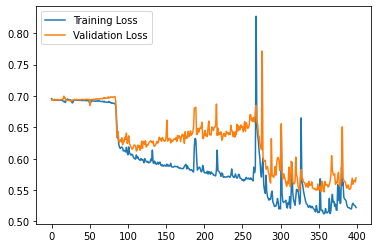

In [14]:
## plot the loss and accuracy
plt.plot(r.history["loss"], label = "Training Loss")
plt.plot(r.history["val_loss"], label = "Validation Loss")
plt.legend();
plt.show();

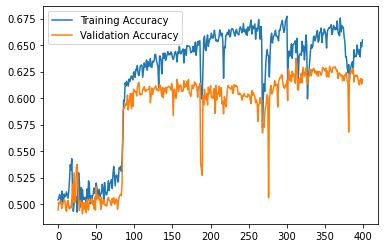

In [15]:
## plot the loss and accuracy
plt.plot(r.history["accuracy"], label = "Training Accuracy")
plt.plot(r.history["val_accuracy"], label = "Validation Accuracy")
plt.legend();
plt.show();

When the Sequence Length is High T = 30 and 20.
+ The LSTM fails to generalizes very Well on the Data.

***

DIFFERENT APPROACH

+ adding return_sequence = True.
+ this will get all the hidden state.
+ and also uses the MaxPooling1D layer.
+ the sequence length is still 30.

In [16]:
## build the dataset
## this is a non-linear and long distance dataset.
## Will test (long-distance) vs (short-distance) patterns.
## starts with a small T and increase it later.
T = 30
D = 1
X = []
Y = []

## function to get label from i1, i2, i3
def get_label(x, i1, i2, i3):
  ## x = sequence
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) ## long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

print(X.shape)
print(Y.shape)

(5000, 30)
(5000,)


In [18]:
## define the inputs
print(X.shape)
## expand the input size to RNN dimension.
inputs = np.expand_dims(X, -1)
print(inputs.shape)

## define the model
i = Input(shape = (T, D))
x = LSTM(5, return_sequences = True)(i)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation = "sigmoid")(x)
model = Model(i, x)
model.summary()

## compile the model
model.compile(
    loss = "binary_crossentropy",
    optimizer = Adam(learning_rate = 0.01),
    metrics = ["accuracy"]
)

## train the model
r = model.fit(inputs, Y, epochs = 400, validation_split = 0.5)

(5000, 30)
(5000, 30, 1)
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 30, 1)]           0         
                                                                 
 lstm_4 (LSTM)               (None, 30, 5)             140       
                                                                 
 global_max_pooling1d (Globa  (None, 5)                0         
 lMaxPooling1D)                                                  
                                                                 
 dense_4 (Dense)             (None, 1)                 6         
                                                                 
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________
Epoch 1/400
79/79 [==============================] - 5s 29ms/step - loss: 0.6939 - accuracy: 0.5012 - 

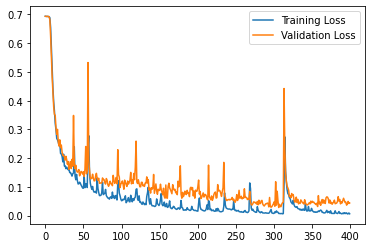

In [19]:
## plot the loss and accuracy
plt.plot(r.history["loss"], label = "Training Loss")
plt.plot(r.history["val_loss"], label = "Validation Loss")
plt.legend();
plt.show();

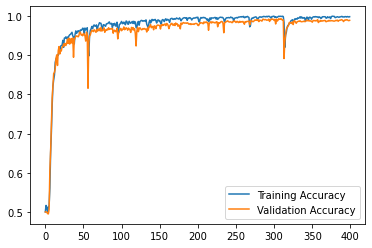

In [20]:
## plot the loss and accuracy
plt.plot(r.history["accuracy"], label = "Training Accuracy")
plt.plot(r.history["val_accuracy"], label = "Validation Accuracy")
plt.legend();
plt.show();

Now the Model is able to generalizes very well.

***